# Pair Programming Intro Machine Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 1. Buscar un conjunto de datos a analizar:

In [2]:
df = pd.read_csv('data/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# número de filas y columnas del dataframe

df.shape

(1338, 7)

In [4]:
# información general del dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [6]:
# No tenemos valores nulos

df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
# Tenemos un valor duplicado

df.duplicated().sum()

1

In [8]:
numericas = df.select_dtypes(include=['int64', 'float64'])
numericas.head(2)

,age,bmi,children,charges
0,19,27.90,0,16884.9240
1,18,33.77,1,1725.5523


Ahora miramos los outlayers:

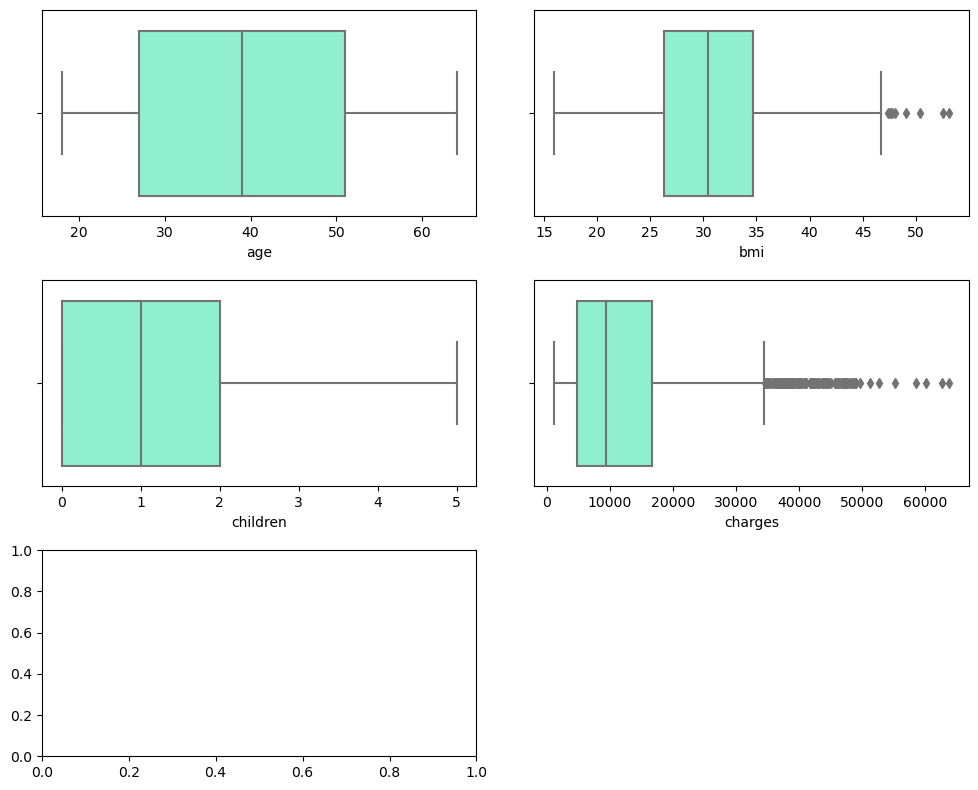

In [9]:
fig, axes = plt.subplots(3,2, figsize=(10,8))

axes = axes.flat

for indice, columna in enumerate(numericas.columns):
    sns.boxplot(x = numericas[columna], data = df, ax=axes[indice], color = "aquamarine"); # para trazar una línea de densidad

    
plt.tight_layout()
fig.delaxes(axes[-1])
plt.show()

## Gestión de outlayers: 

Hay muchos outlayers en la columna 'charges'. Vamos a ver si siguen algún patrón:

In [10]:
def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 1.5 * IQR
        
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
        

    
    return dicc_indices 

In [11]:
lista_columnas1 = list(numericas.columns)
ind1 = detectar_outliers(lista_columnas1, df)

In [12]:
print(ind1)

{'bmi': [116, 286, 401, 543, 847, 860, 1047, 1088, 1317], 'charges': [14, 19, 23, 29, 30, 34, 38, 39, 49, 53, 55, 82, 84, 86, 94, 109, 123, 146, 158, 161, 175, 185, 203, 223, 240, 242, 251, 252, 254, 256, 263, 265, 271, 281, 288, 292, 298, 312, 314, 322, 327, 328, 330, 338, 373, 377, 381, 420, 421, 422, 441, 476, 488, 500, 524, 530, 543, 549, 558, 569, 577, 587, 609, 615, 621, 623, 629, 665, 667, 668, 674, 677, 682, 689, 697, 706, 725, 736, 738, 739, 742, 759, 803, 819, 826, 828, 842, 845, 850, 852, 856, 860, 883, 893, 901, 917, 947, 951, 953, 956, 958, 1012, 1021, 1022, 1031, 1036, 1037, 1047, 1049, 1062, 1070, 1078, 1090, 1096, 1111, 1117, 1118, 1122, 1124, 1139, 1146, 1152, 1156, 1186, 1206, 1207, 1218, 1230, 1240, 1241, 1249, 1284, 1288, 1291, 1300, 1301, 1303, 1313, 1323]}


Vamos a ver si siguen algún patrón:

In [13]:
Q1 = np.percentile(df['charges'], 25)
Q1

4740.28715

In [14]:
Q3 = np.percentile(df['charges'], 75)
Q3

16639.912515

In [15]:
IQR = Q3 - Q1
IQR

11899.625365

In [16]:
outlier_step = 1.5 * IQR
outlier_step

17849.4380475

In [17]:
outliers_data = df[(df["charges"] < Q1 - outlier_step) | (df['charges'] > Q3 + outlier_step)]

In [18]:
outliers_data.head(10)

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.13,0,yes,southeast,39611.75770
19,30,male,35.30,0,yes,southwest,36837.46700
23,34,female,31.92,1,yes,northeast,37701.87680
29,31,male,36.30,2,yes,southwest,38711.00000
30,22,male,35.60,0,yes,southwest,35585.57600
34,28,male,36.40,1,yes,southwest,51194.55914
38,35,male,36.67,1,yes,northeast,39774.27630
39,60,male,39.90,0,yes,southwest,48173.36100
49,36,male,35.20,1,yes,southeast,38709.17600
53,36,male,34.43,0,yes,southeast,37742.57570


In [19]:
outliers_data['smoker'].value_counts()

yes    136
no       3
Name: smoker, dtype: int64

Parece que los outlayers representan a los fumadores. Dividimos el DF entre fumadores y no fumadores para dejar los outlayers a parte.

In [20]:
df_fumadores = df[df['smoker'] != 'no']

In [21]:
df_fumadores.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
11,62,female,26.29,0,yes,southeast,27808.7251
14,27,male,42.13,0,yes,southeast,39611.7577
19,30,male,35.30,0,yes,southwest,36837.4670
23,34,female,31.92,1,yes,northeast,37701.8768


In [22]:
df_nofumadores = df[df['smoker'] != 'yes']

In [23]:
df_nofumadores.head()

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


In [24]:
numericas1 = df_nofumadores.select_dtypes(include=['int64', 'float64']) #Seleccionamos nuestras numéricas
numericas1.head(2)

,age,bmi,children,charges
1,18,33.77,1,1725.5523
2,28,33.00,3,4449.4620


In [25]:
lista_columnas = list(numericas1.columns) 
lista_columnas

['age', 'bmi', 'children', 'charges']

In [26]:
ind = detectar_outliers(lista_columnas, df_nofumadores) #Aplicamos nuestra función

In [27]:
print(ind)

{'bmi': [116, 286, 401, 847, 1088, 1317], 'charges': [242, 1012, 1206]}


In [28]:
df_nofumadores.shape #Como nuestro dataframe tiene muchos registros y hay pocos outlayers, decidimos eliminarlos

(1064, 7)

In [29]:
df_nofumadores.tail()

,age,sex,bmi,children,smoker,region,charges
1332,52,female,44.70,3,no,southwest,11411.6850
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450


#### Eliminar outlayers

In [30]:
df_nofumadores

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


In [31]:
valores_nofum = ind.values()
valores_nofum

dict_values([[116, 286, 401, 847, 1088, 1317], [242, 1012, 1206]])

In [32]:
# hacemos una set comprehension para aplanar nuestra lista de listas y dejar un set. Puede ser que nos encontremos con índices que están repetidos, ya que puede ser que una fila tenga valores que sean outliers para dos columnas. 

valores_nofum = {indice for sublista in valores_nofum for indice in sublista}
print(valores_nofum)


{1088, 1317, 847, 401, 242, 116, 1012, 1206, 286}


In [33]:
# nos hacemos una copia del dataframe original

dfsin_outliers = df_nofumadores.copy()
dfsin_outliers.head(2)

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [43]:
indices = {1317, 847, 401, 242, 116, 1012, 1206, 286}

In [44]:
final = dfsin_outliers.drop(dfsin_outliers.index[list(indices)])

IndexError: index 1317 is out of bounds for axis 0 with size 1064

In [40]:
dfsin_outliers.tail()

,age,sex,bmi,children,smoker,region,charges
1332,52,female,44.70,3,no,southwest,11411.6850
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450


In [47]:
dfsin_outliers.shape

(1064, 7)

In [48]:
df_nofumadores.shape

(1064, 7)

In [49]:
dfsin_outliers.iloc[237]   

age                50
sex              male
bmi              26.6
children            0
smoker             no
region      southwest
charges      8444.474
Name: 310, dtype: object

## 2. Explicar los datos y las variables disponibles en el conjunto de datos seleccionado:

- Esto se hace para que comprendais mejor los datos con los que estais trabajando.

- Realizar un EDA sencillo para la variable dependiente y la variable independiente.


#### Primero analizamos nuestra variable respuesta:

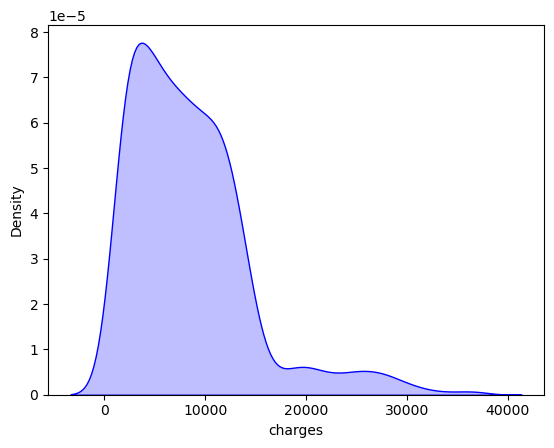

In [ ]:
sns.distplot(
    df_nofumadores["charges"], 
    hist = False, 
    color = "blue", 
    kde_kws = {"shade": True, "linewidth": 1});

#### Luego nuestra variables predictorias: 

In [ ]:
df_nofumadores.select_dtypes(include = np.number).describe().T


,count,mean,std,min,25%,50%,75%,max
age,1064.0,39.385338,14.083410,18.0000,26.7500,40.0000,52.00000,64.00000
bmi,1064.0,30.651795,6.043111,15.9600,26.3150,30.3525,34.43000,53.13000
children,1064.0,1.090226,1.218136,0.0000,0.0000,1.0000,2.00000,5.00000
charges,1064.0,8434.268298,5993.781819,1121.8739,3986.4387,7345.4053,11362.88705,36910.60803


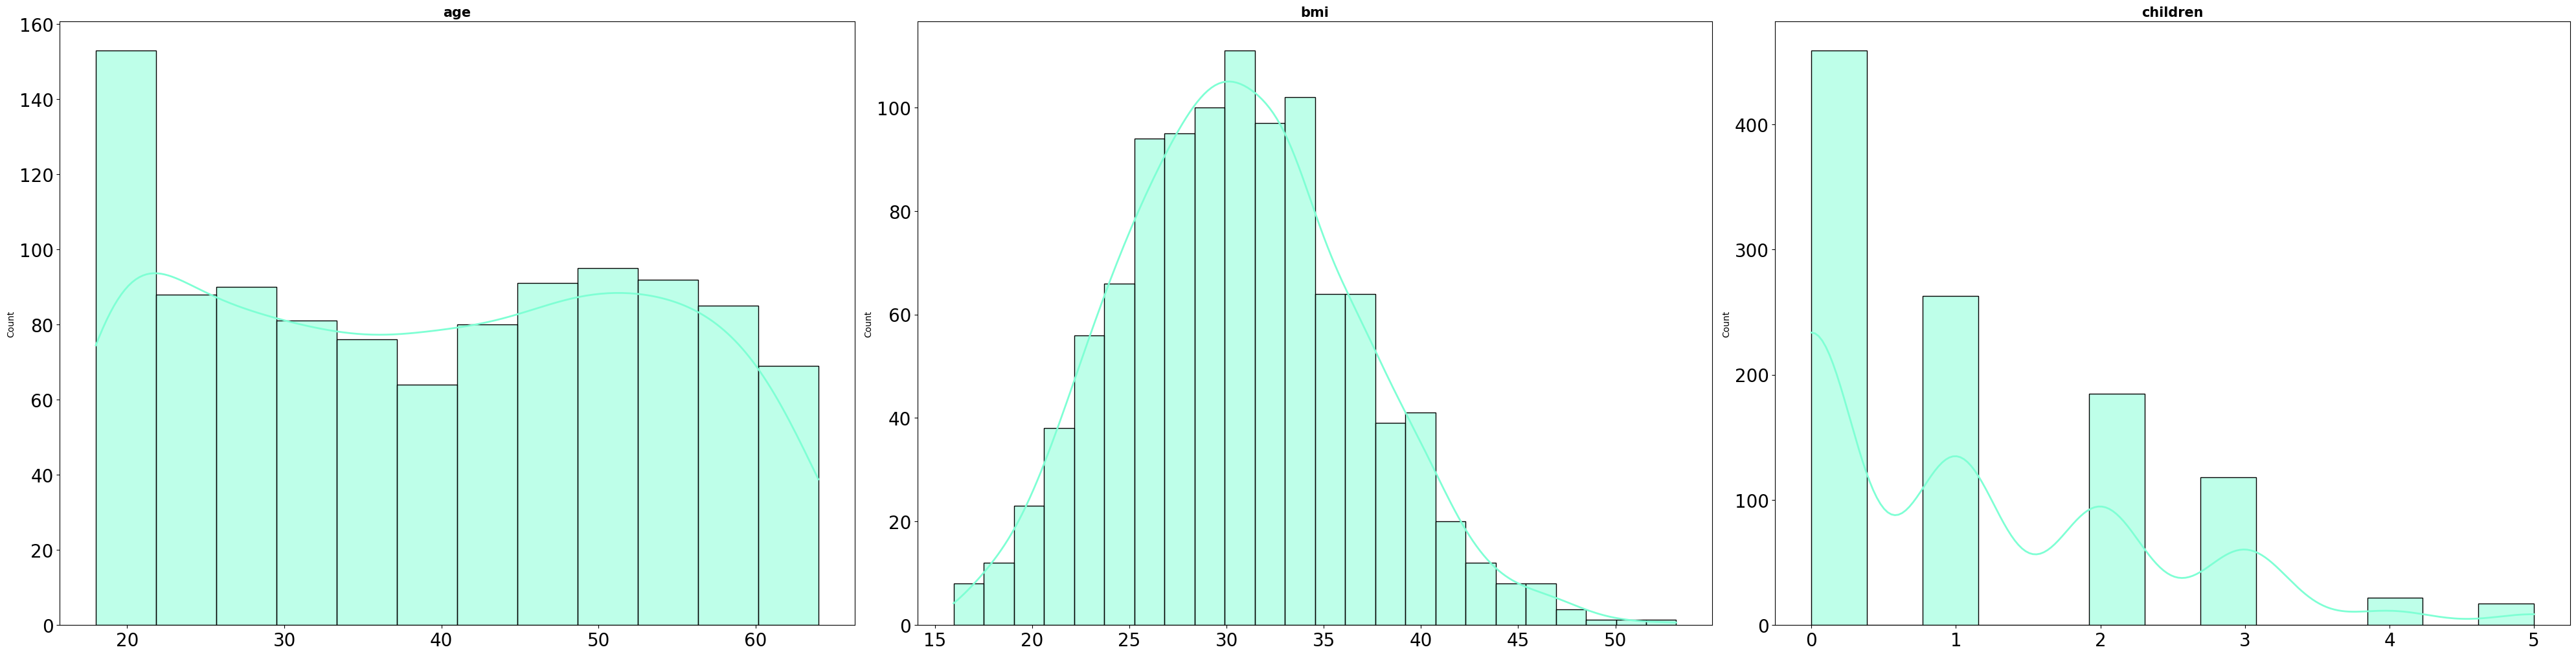

In [ ]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================

fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (40, 20))


axes = axes.flat

columnas_numeric = df_nofumadores.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("charges")

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = df_nofumadores,
        x = colum,
        kde = True, 
        color = "aquamarine", 
        line_kws = {"linewidth": 2}, # para indicar el ancho de las líneas de las barras
        alpha = 0.5, # para especificar la transparencia del color
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

fig.tight_layout()
fig.delaxes(axes[-1])
fig.delaxes(axes[-2])
fig.delaxes(axes[-3]);

    


## Vamos a ver la correlación de nuestros datos:

<AxesSubplot:>

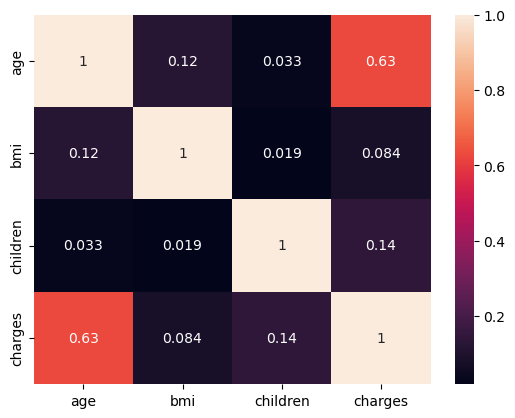

In [ ]:
sns.heatmap(df_nofumadores.corr(), annot=True)

## Guardamos nuestro CSV con los datos de los no fumadores

In [ ]:
df_nofumadores.to_csv('data/nofumadores.csv')